### About:
5/11/2021 Program calculate the correlation coefficient between state and age population in 2009

    (1) between internet speeds
    (2) between states
    (3) between states & internet speeds??? -> Self Assigned

#### NOTE: Make sure to unzip the xlsx files

@author: Minh Nguyen @AIA

@credit: Qasim, Andrei @AIA

In [1]:
import numpy as np
from numpy.random import randn
from numpy.random import seed
from numpy import array_split
import pandas as pd
from sklearn import metrics as mt
from sklearn import model_selection as md
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
import random

### Correlation Calculation

In [2]:
def correlation_cal(df):
    # Instead of just dropping the missing values, we will fill in N/A values
    if df.isna().values.any():
        while True:
            missing_type = input("Please enter the type of missing value replacement: mean, medium, mode, or drop from the row")
            missing_type = missing_type.lower()
            if(missing_type in ['mean', 'median', 'mode', 'drop']):
                if(missing_type == 'mean'):
                    df.fillna(df.mean(), inplace=True)
                elif(missing_type == 'median'):
                    df.fillna(df.median(), inplace=True)
                elif(missing_type == 'mode'):
                    df.fillna(df.mode(), inplace=True)
                else:
                    df.dropna()
                break
            else:
                print("Please input the option from the list")
    
    # Calculate input data correlation
    while True:
        corr_type = input("Please enter type of correlation: Pearson, Spearman, or Kendall: ")
        corr_type = corr_type.lower()
        if corr_type in ['pearson', 'spearman', 'kendall']:
            break
        else:
            print("Please try again")
    
    # Plot correlation matrix
    corrMatrix = df.corr(method=corr_type)
    _, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corrMatrix, ax = ax, cmap="YlGnBu", linewidths = 0.1) # cmap can also be "YlGnBu"

# (1) Correlation Calculation Between Population Range

#### Preprocess Data

In [4]:
!ls

Correlation-2008.ipynb
Correlation-2009.ipynb
Original Dataset
preprocessed_data.xlsx


In [5]:
def parse_data_bis(file, sheetname):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by internet speed for all 50 states + nation (row 0)
    """
    dataset = pd.read_excel(file, sheet_name = sheetname, skiprows=[0,1,56,57,58,59,60,61,62,63,64,65,66,67], usecols=[1,2,3,4,5,6,7])
    return dataset

In [6]:
df_bis = parse_data_bis("preprocessed_data.xlsx", "2009")

In [7]:
df_bis.head()

,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
0,77140300,27615100,35803300,85002800,34519200,37917100,297997800
1,1172700,422600,531900,1266900,549200,625700,4569100
2,194900,68700,81300,194400,78200,51200,668900
3,1786200,595200,831100,1696500,696300,852700,6457900
4,731200,251000,328600,759600,334500,391200,2796100


### Run 1: Correlation Pearson - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


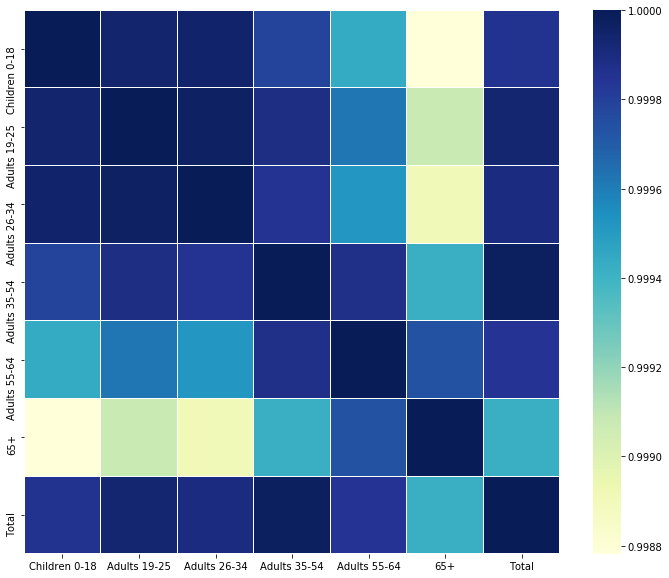

In [8]:
# Run Correlation Pearson
correlation_cal(df_bis)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


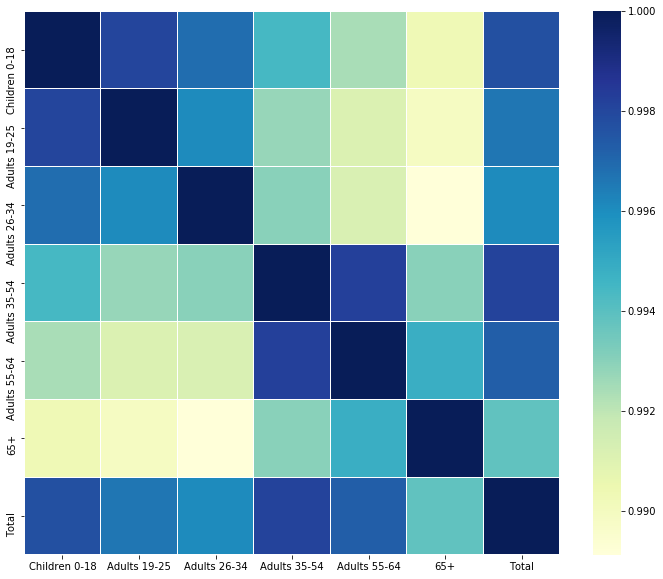

In [9]:
# Run Correlation Spearman
correlation_cal(df_bis)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


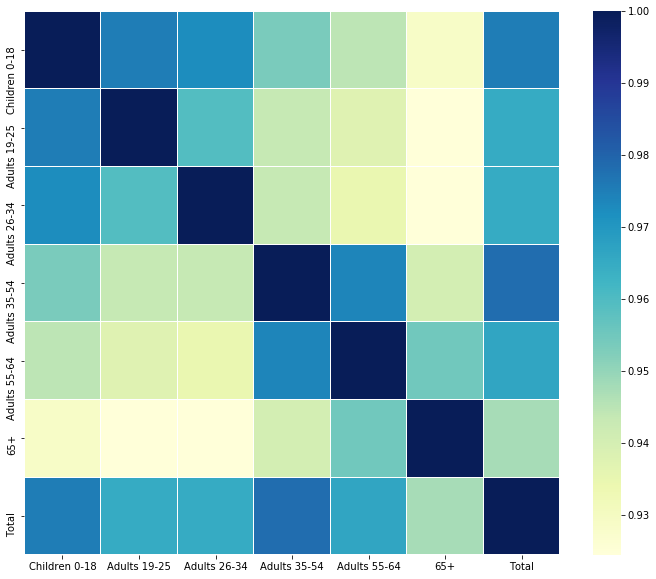

In [10]:
# Run Correlation Kendall
correlation_cal(df_bis)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?

# (2) Correlation Calculation Between States

In [11]:
def parse_data_bs(file, sheetname):
    """ Function load csv files into csv pandas by internet speed 
        Function parse data by states and nation for all 10 types of internet speeds
    """
    dataset = pd.read_excel(file, sheet_name = sheetname, skiprows=[0,1,2,56,57,58,59,60,61,62,63,64,65,66,67], usecols=[0,1,2,3,4,5,6,7], drop=True)
    dataset.set_index("United States", inplace=True)
    dataset = dataset.T
    
    return dataset

In [12]:
df_bs = parse_data_bs("preprocessed_data.xlsx", "2008")

In [13]:
df_bs.head()

United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
76770400,1168700,184700,1776500,727200,9749000,1249600,842100,216800,117000,4172400,...,1516800,6989400,884200,132700,1890200,1607700,391400,1356900,134900,1030200
27241500,429900,74100,572900,250300,3619900,449500,278400,76300,62300,1527100,...,518200,2290300,329200,50100,658300,551100,148600,501700,48500,392200
34823900,509400,79700,801300,314800,4515600,636000,346300,91700,90200,1927000,...,721300,3017100,378800,60900,848000,782300,196900,618700,59600,477800
85799700,1274800,189300,1691800,763200,10346900,1442600,1060800,242800,159200,5022200,...,1775000,6634500,631800,191000,2241100,1896300,514100,1632800,146700,1026300
33433900,531800,78700,669500,324000,3643000,542100,403800,102100,64300,2121600,...,733100,2342700,223200,81000,875500,772500,243700,646500,62900,444100


### Run 1: Correlation Pearson - Mean


Please enter type of correlation: Pearson, Spearman, or Kendall: Pearson


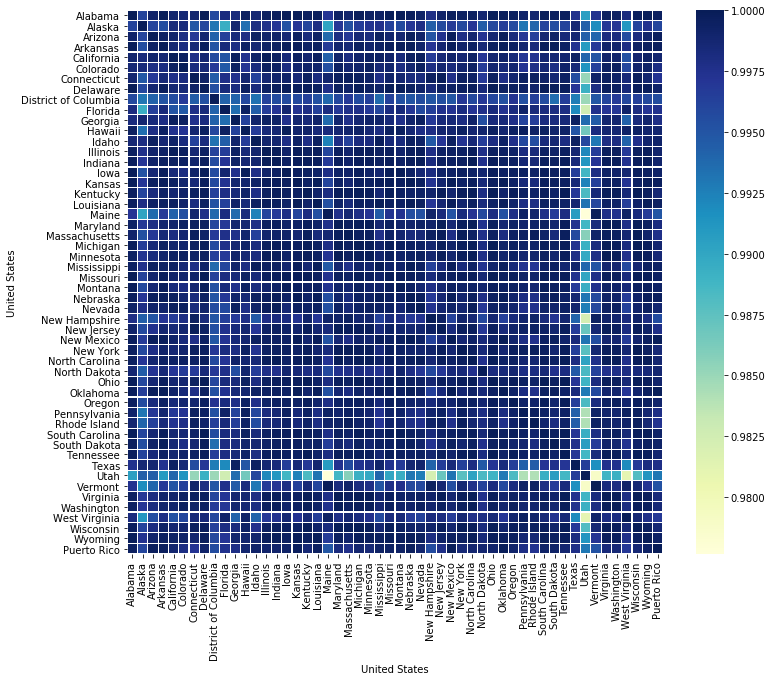

In [14]:
# Run Correlation Pearson
correlation_cal(df_bs)

### Run 2: Correlation Spearman - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Spearman


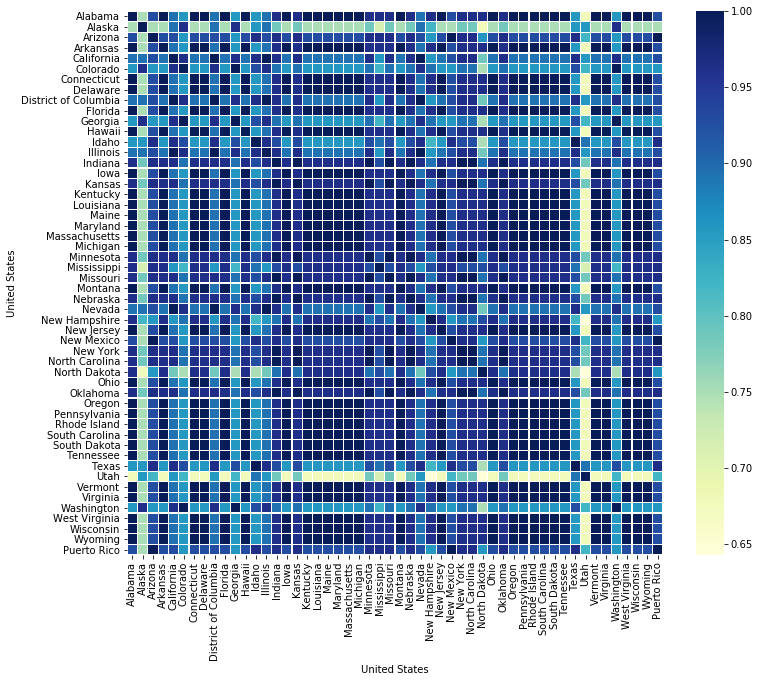

In [15]:
# Run Correlation Spearman
correlation_cal(df_bs)

### Run 3: Correlation Kendall - Mean

Please enter type of correlation: Pearson, Spearman, or Kendall: Kendall


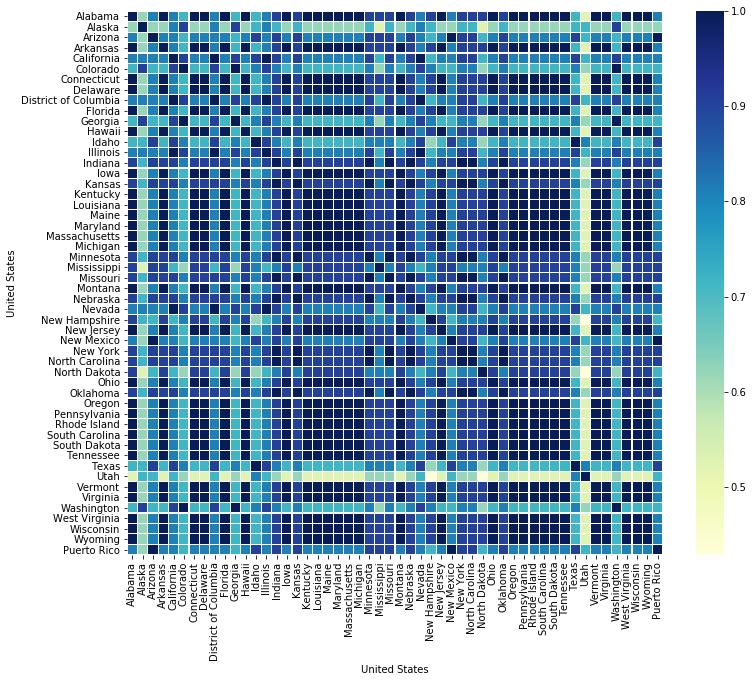

In [16]:
# Run Correlation Kendall
correlation_cal(df_bs)

### Analysis - Self Assigned

1/ What are the two significant correlation coefficient for Pearson, Spearman, Kendall?

2/ What are other analysis we can do with these graphs?

3/ Any other metric besides Pearson, Spearman, Kendall?